In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import nept

In [2]:
thisdir = os.getcwd()
data_filepath = os.path.join(thisdir, "cache", "data")
output_filepath = os.path.join(thisdir, "plots")
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)

In [16]:
event_filepath = os.path.join(data_filepath, "RR1_2019-05-31_test", "2019-05-31_Events.nev")

In [17]:
event_filepath

'E:\\code\\emi_experience\\cache\\data\\RR1_2019-05-31_test\\2019-05-31_Events.nev'

In [18]:
evts = nept.load_nev(event_filepath)

In [19]:
evt_labels = []
for tt in evts:
    evt_labels.append(tt[-1])

In [20]:
np.unique(evt_labels)

array([b'NOT firing feeder EastFeeder', b'NOT firing feeder NorthFeeder',
       b'NOT firing feeder SouthFeeder', b'NOT firing feeder WestFeeder',
       b'Starting Recording', b'Stopping Recording',
       b'TTL Input on AcqSystem1_0 board 0 port 1 value (0x0000).',
       b'TTL Input on AcqSystem1_0 board 0 port 1 value (0x0001).',
       b'TTL Input on AcqSystem1_0 board 0 port 1 value (0x0002).',
       b'TTL Input on AcqSystem1_0 board 0 port 1 value (0x0004).',
       b'TTL Input on AcqSystem1_0 board 0 port 1 value (0x0008).',
       b'TTL Input on AcqSystem1_0 board 0 port 1 value (0x0010).',
       b'TTL Input on AcqSystem1_0 board 0 port 1 value (0x0020).',
       b'TTL Input on AcqSystem1_0 board 0 port 1 value (0x0040).',
       b'TTL Input on AcqSystem1_0 board 0 port 1 value (0x0080).',
       b'TTL Input on AcqSystem1_0 board 0 port 1 value (0x00C0).',
       b'TTL Output on AcqSystem1_0 board 0 port 2 value (0x0000).',
       b'TTL Output on AcqSystem1_0 board 0 port 2

In [21]:
event_labels = dict(north_feeder='TTL Output on AcqSystem1_0 board 0 port 2 value (0x0001).',
                    north_feeder_not='NOT firing feeder NorthFeeder',
                    north_start_pb='TTL Input on AcqSystem1_0 board 0 port 1 value (0x0001).',
                    north_end_pb='TTL Input on AcqSystem1_0 board 0 port 1 value (0x0002).',
                    east_feeder='TTL Output on AcqSystem1_0 board 0 port 2 value (0x0004).',
                    east_feeder_not='NOT firing feeder EastFeeder',
                    east_start_pb='TTL Input on AcqSystem1_0 board 0 port 1 value (0x0004).',
                    east_end_pb='TTL Input on AcqSystem1_0 board 0 port 1 value (0x0008).',
                    south_feeder='TTL Output on AcqSystem1_0 board 0 port 2 value (0x0008).',
                    south_feeder_not='NOT firing feeder SouthFeeder',
                    south_start_pb='TTL Input on AcqSystem1_0 board 0 port 1 value (0x0010).',
                    south_end_pb='TTL Input on AcqSystem1_0 board 0 port 1 value (0x0020).',
                    west_feeder='TTL Output on AcqSystem1_0 board 0 port 2 value (0x0010).',
                    west_feeder_not='NOT firing feeder WestFeeder',
                    west_start_pb='TTL Input on AcqSystem1_0 board 0 port 1 value (0x0040).',
                    west_end_pb='TTL Input on AcqSystem1_0 board 0 port 1 value (0x0080).',
                    trial_start='trial start',
                    trial_end='trial end',
                    tone_on="tone on")

In [22]:
events = nept.load_events(os.path.join(data_filepath, event_filepath), event_labels)

In [23]:
events

{'north_feeder': array([1670.551103, 1694.873478, 1732.94401 , 1841.257603]),
 'north_feeder_not': array([1469.05233 , 1649.154591, 1714.077125, 1775.021009, 1797.321573]),
 'north_start_pb': array([1466.135853, 1646.150853, 1666.947916, 1692.067947, 1699.444353,
        1712.192635, 1719.714416, 1730.804666, 1738.16101 , 1770.761166,
        1793.402541, 1801.110791, 1837.019416]),
 'north_end_pb': array([1469.000791, 1649.113947, 1649.985822, 1650.018947, 1670.20976 ,
        1694.529541, 1694.751978, 1714.047072, 1732.627947, 1775.017353,
        1775.436228, 1797.317916, 1797.871666, 1840.954978, 1841.664228]),
 'east_feeder': array([1683.137853, 1761.922541]),
 'east_feeder_not': array([1594.489484]),
 'east_start_pb': array([1588.26426 , 1598.982916, 1677.779728, 1686.864635, 1758.040103,
        1768.426635]),
 'east_end_pb': array([1594.440291, 1682.815541, 1761.61676 , 1763.580791, 1765.001916]),
 'south_feeder': array([1561.015916, 1606.656353, 1630.407947, 1818.627603]),
 's

In [24]:
feeders = ["north_feeder", "east_feeder", "south_feeder", "west_feeder"]
photobeams = ["north_start_pb", "north_end_pb", "east_start_pb", "east_end_pb", 
              "south_start_pb", "south_end_pb", "west_start_pb", "west_end_pb"]

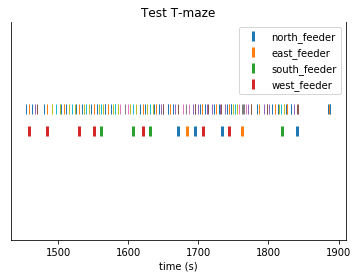

In [25]:
fig, ax = plt.subplots()
legend = []
for feeder in feeders:
    plt.plot(events[feeder], np.ones(len(events[feeder])), "|", ms=10, mew=3)
    legend.append(feeder)
    
for photobeam in photobeams:
    plt.plot(events[photobeam], np.ones(len(events[photobeam]))+0.1, "|", ms=10, mew=1)
#     legend.append(photobeam)
    
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time (s)")
plt.legend(legend)
plt.title("Test T-maze")
plt.ylim(0.5, 1.5)

plt.show()

In [26]:
len(np.unique(events["trial_start"])), len(np.unique(events["trial_end"]))

(36, 36)

In [27]:
trials = nept.Epoch(events["trial_start"], events["trial_end"])

ValueError: start must be less than stop

In [28]:
trials

NameError: name 'trials' is not defined

In [29]:
events["north_start_pb"]

array([1466.135853, 1646.150853, 1666.947916, 1692.067947, 1699.444353,
       1712.192635, 1719.714416, 1730.804666, 1738.16101 , 1770.761166,
       1793.402541, 1801.110791, 1837.019416])

In [30]:
starts = []
for trial in trials:
    ok = events["north_start_pb"][(trial.start - events["north_start_pb"]).argmin()]

    print(ok, trial.start)

NameError: name 'trials' is not defined

In [31]:
north_trial = nept.Epoch(events["north_start_pb"], events["north_end_pb"])

ValueError: must have the same number of start and stop times

In [ ]:
feeders = ["north_feeder"]
photobeams = ["north_start_pb", "north_end_pb"]

fig, ax = plt.subplots()
legend = []
for feeder in feeders:
    plt.plot(events[feeder], np.ones(len(events[feeder])), "|", ms=20, mew=3)
    legend.append(feeder)
    
for photobeam in photobeams:
    plt.plot(events[photobeam], np.ones(len(events[photobeam])), "|", ms=10, mew=1)
#     legend.append(photobeam)
    
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time (s)")
plt.legend(legend)
plt.title("Test T-maze")
plt.ylim(0.5, 1.5)

plt.show()